<a href="https://colab.research.google.com/github/Foco22/IndustriaAFPs/blob/main/Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bs4

In [3]:
!pip install requests

In [4]:
!pip install beautifulsoup4

In [2]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

     |████████████████████████████████| 911kB 8.4MB/s 
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://security.ub

In [3]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
import matplotlib.pyplot as plt

# **Rentabilidad Mensuales de las AFPs**

In [4]:
!pip install selenium-wire

     |████████████████████████████████| 839kB 8.6MB/s 


In [5]:
! pip3 install  pyvirtualdisplay selenium webdriver_manager  > /dev/null
! apt install firefox  xvfb > /dev/null

In [6]:
import bs4 as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)


driver.get('https://www.spensiones.cl/apps/rentabilidad/getRentabilidad.php?tiprent=FP&template=0')

wait = WebDriverWait(driver, 10)

html = driver.execute_script('return document.documentElement.outerHTML')
soup = bs.BeautifulSoup(html, 'html.parser')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [7]:
def cambio_url(ano,mes):
    
    s2 = Select(driver.find_element_by_name('aaaa'))
    s2.select_by_value(ano)
    s2 = Select(driver.find_element_by_name('mm'))
    s2.select_by_value(mes)
    s3 = driver.find_element_by_name('btn')
    s3.click()

    #soup = BeautifulSoup(driver.page_source)
    #soup = bs4.BeautifulSoup(web_page_text, "lxml")
    
    html = driver.execute_script('return document.documentElement.outerHTML')
    soup = bs.BeautifulSoup(html, 'html.parser')
    #soup = bs(driver.content)

    tabla = soup.find_all('td',{'align':'right'})
    
    return tabla

In [8]:
df = pd.DataFrame(columns =['Año','Periodo','AFP','Fondo','Rentabilidad Mensual'])
FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']
AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA','UNO','SISTEMA']

def datos_2019_2020(df):
    años_lista = ['2019','2019','2019','2020','2020','2020','2020','2020','2020','2020','2020']
    mes_lista =  ['10','11','12','01','02','03','04','05','06','07','08']
    
    for a, b in zip(años_lista,mes_lista):
        
        gdp_table = cambio_url(str(a),str(b))
        valores = []
        for idx, val in enumerate(gdp_table):
                val = str(val)
                start = '"right">'
                end = '</td>'
                val = val[val.find(start)+len(start):val.rfind(end)]
                numero = ''
                for i in list(val):
                    if i not in  (',','%','-'):
                        numero = numero + i
                if numero != '\xa0':
                    if val[0] != '-':
                        numero = int(numero)/100
                    else:
                        numero = int(numero)/100*-1
                else:
                        numero = 0  
                fondo_c = range(64,105)
                fondo_e = range(136,176)
                #print(idx,val)
                if idx in fondo_c:
                    if idx in (64, 69, 74, 79,84, 89, 94, 99,104):
                        valores.append(numero)
                elif idx in fondo_e:
                    if idx in (136,141, 146, 151, 156, 161, 166, 171):
                        valores.append(numero)
                elif idx % 4 == 0:
                        valores.append(numero)
        contador = 0
        for i in FONDOS:
            for j in AFPS:
                new_row = {'Año': a, 'Periodo':b, 'AFP':j, 'Fondo':i, 'Rentabilidad Mensual':valores[contador]}
                df = df.append(new_row, ignore_index=True)
                contador = 1 + contador
    return df
datos_2019_2020 = datos_2019_2020(df)

In [11]:
datos_2019_2020.head()

,Año,Periodo,AFP,Fondo,Rentabilidad Mensual
0,2019,10,CAPITAL,FONDO A,1.30
1,2019,10,CUPRUM,FONDO A,1.32
2,2019,10,HABITAT,FONDO A,1.51
3,2019,10,MODELO,FONDO A,1.44
4,2019,10,PLANVITAL,FONDO A,1.34


In [46]:
import datetime
import calendar

from datetime import date

def add_one_month(orig_date):
    # advance year and month by one month
    new_year = orig_date.year
    new_month = orig_date.month + 1
    # note: in datetime.date, months go from 1 to 12
    if new_month > 12:
        new_year += 1
        new_month -= 12

    last_day_of_month = calendar.monthrange(new_year, new_month)[1]
    new_day = min(orig_date.day, last_day_of_month)

    return orig_date.replace(year=new_year, month=new_month, day=new_day)

fechas = []
nueva_fecha = date(2010, 9, 1)

for x in range(120):
    nueva_fecha = add_one_month(nueva_fecha)
    fechas.append(nueva_fecha)
    
fechas_df = pd.DataFrame(fechas, columns = ['Fecha'])

fechas_df['Año'] = fechas_df['Fecha'].apply(lambda x : x.year)
fechas_df['mes'] = fechas_df['Fecha'].apply(lambda x : x.month)
año_lista = list(fechas_df['Año'])
mes_lista = list(fechas_df['mes'])

def mes():
    conteo = 0
    for i in fechas_df['mes']:
        if   i < 10 :
            fechas_df.iloc[conteo,2]= "0" + str(i)
        else:
            fechas_df.iloc[conteo,2]= str(i)
        conteo = conteo +1
mes()

In [49]:
fechas_df.head()

,Fecha,Año,mes
0,2010-10-01,2010,10
1,2010-11-01,2010,11
2,2010-12-01,2010,12
3,2011-01-01,2011,01
4,2011-02-01,2011,02


In [40]:
df = pd.DataFrame(columns =['Año','Periodo','AFP','Fondo','Rentabilidad Mensual'])
FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']
AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA','SISTEMA']


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)


driver.get('https://www.spensiones.cl/apps/rentabilidad/getRentabilidad.php?tiprent=FP&template=0')

wait = WebDriverWait(driver, 10)

html = driver.execute_script('return document.documentElement.outerHTML')
soup = bs.BeautifulSoup(html, 'html.parser')


def datos_2010_2019(fechas_df,df):

    #periodo = ['2010', '2010']
    #mes = ['01','02']
    periodo = list(fechas_df['Año'])
    mes = list(fechas_df['mes'])

    #print(mes)
    suma = 0
    for a, b in zip(periodo,mes):
        a = str(a)
        b = str(b)
        gdp_table = cambio_url(a,b)
        valores = []
        for idx, val in enumerate(gdp_table):
                val = str(val)
                #print(gdp_table)
                start = '"right">'
                end = '</td>'
                val = val[val.find(start)+len(start):val.rfind(end)]
                numero = ''
                for i in list(val):
                    if i not in  (',','%','-'):
                        numero = numero + i
                if numero != '\xa0':
                    if val[0] != '-':
                        numero = int(numero)/100
                    else:
                        numero = int(numero)/100*-1
                else:
                        numero = 0 
     
                fondo_c = range(56,87)
                fondo_e = range(116,155)
                fondo_d = range(88,116)
                if idx in fondo_c:
                    if idx in (56, 61, 66, 71,76,81, 86):
                        valores.append(numero)
                elif idx in fondo_d:
                    if idx in (91, 95, 99,103,107, 111,115):
                        #print('h0la')
                        valores.append(numero)
                elif idx in fondo_e:
                    if idx in (119,124, 129, 134, 139, 144, 149):
                        valores.append(numero)
                elif idx % 4 == 0:
                        valores.append(numero)
        contador = 0
        #print(valores)
        suma = suma + 1
        #print(suma)
        if len(valores) ==0:
           return df
        for i in FONDOS:
            for j in AFPS:
                new_row = {'Año': a, 'Periodo':b, 'AFP':j, 'Fondo':i, 'Rentabilidad Mensual':valores[contador]}
                df = df.append(new_row, ignore_index=True)
                contador = 1 + contador
    return df
datos_2017_2019 = datos_2010_2019(fechas_df,df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [45]:
frames = [datos_2010_2015,datos_2013_2019, datos_2017_2019, datos_2019_2020]

df_rentabilidad = pd.concat(frames)

df_rentabilidad

,Año,Periodo,AFP,Fondo,Rentabilidad Mensual
0,2010,09,CAPITAL,FONDO A,5.76
1,2010,09,CUPRUM,FONDO A,5.53
2,2010,09,HABITAT,FONDO A,5.83
3,2010,09,MODELO,FONDO A,4.86
4,2010,09,PLANVITAL,FONDO A,6.13
...,...,...,...,...,...
435,2020,08,MODELO,FONDO E,2.24
436,2020,08,PLANVITAL,FONDO E,2.29
437,2020,08,PROVIDA,FONDO E,2.37
438,2020,08,UNO,FONDO E,2.15


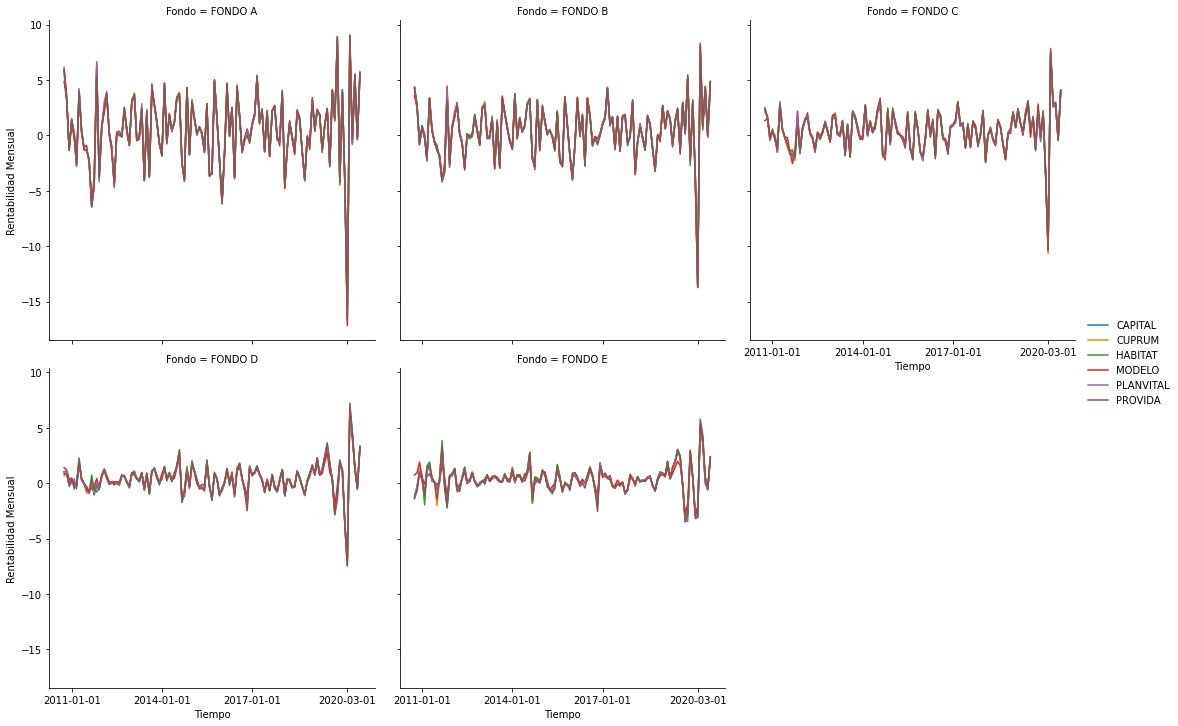

In [50]:
FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']
AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA']


df_rentabilidad_fecha = pd.DataFrame(columns = ['Año','Periodo', 'AFP','Fondo' ,'Rentabilidad Mensual','Fecha'])

for x in FONDOS:
    for i in AFPS:
        df_rentabilidad_f = df_rentabilidad.loc[(df_rentabilidad['AFP'] == i) & (df_rentabilidad['Fondo'] == x)]
        df_rentabilidad_f = df_rentabilidad_f.reset_index()
        df_rentabilidad_f['Fecha'] = fechas_df['Fecha']
        df_rentabilidad_fecha = df_rentabilidad_fecha.append(df_rentabilidad_f, ignore_index=True)

df_rentabilidad_fecha.drop(columns = 'index',inplace = True)

#df_rentabilidad_fecha['Rentabilidad Mensual'] = df_rentabilidad_fecha['Rentabilidad Mensual'].apply(lambda x : float(x)*100)
g = sns.FacetGrid(df_rentabilidad_fecha, col="Fondo", height=5, col_wrap=3) #size = (10,10))
g.map_dataframe(sns.lineplot, x="Fecha", y="Rentabilidad Mensual", hue = 'AFP')
g.set_axis_labels("Tiempo", 'Rentabilidad Mensual')
g.set(xticks=[date(2011, 1, 1), date(2014, 1, 1), date(2017, 1, 1), date(2020, 3, 1)])
g.add_legend()
sns.despine(left = False, bottom=False)

Text(0.5, 1.0, 'Rentabilidad Mensual del Fondo C durante los ultimos 10 años')

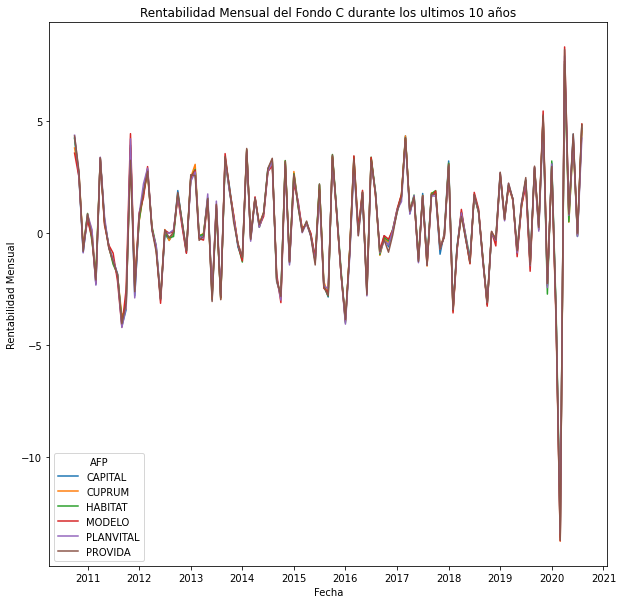

In [51]:
df_rentabilidad_fecha.loc[df_rentabilidad_fecha['Fondo']== 'FONDO C']
plt.figure(figsize = (10,10))
sns.lineplot(data = df_rentabilidad_fecha.loc[df_rentabilidad_fecha['Fondo']== 'FONDO B'], x="Fecha", y="Rentabilidad Mensual", hue = 'AFP')
plt.title('Rentabilidad Mensual del Fondo C durante los ultimos 10 años')


# **Comision por las  AFPs**

In [52]:
from google.colab import files
uploaded = files.upload()

Saving COMISION.csv to COMISION.csv


In [56]:
import io
df_comision = pd.read_csv(io.BytesIO(uploaded['COMISION.csv']), encoding='ISO-8859-1', sep = ';')
df_comision.head()

,Fecha,Año,Periodo,Comision,AFP
0,31-10-2010,2010,10,1.44,CAPITAL
1,30-11-2010,2010,11,1.44,CAPITAL
2,31-12-2010,2010,12,1.44,CAPITAL
3,31-01-2011,2011,1,1.44,CAPITAL
4,28-02-2011,2011,2,1.44,CAPITAL


In [93]:
def mes():
    conteo = 0
    for i in df_comision['Periodo']:
        if   i < 10 :
            df_comision.iloc[conteo,2]= "0" + str(i)
        else:
            df_comision.iloc[conteo,2]= str(i)
        conteo = conteo +1
mes()


In [94]:
df_comision

,Fecha,Año,Periodo,Comision,AFP
0,31-10-2010,2010,10,1.44,CAPITAL
1,30-11-2010,2010,11,1.44,CAPITAL
2,31-12-2010,2010,12,1.44,CAPITAL
3,31-01-2011,2011,01,1.44,CAPITAL
4,28-02-2011,2011,02,1.44,CAPITAL
...,...,...,...,...,...
715,01-05-2020,2020,05,0.77,MODELO
716,01-06-2020,2020,06,0.77,MODELO
717,01-07-2020,2020,07,0.77,MODELO
718,01-08-2020,2020,08,0.77,MODELO


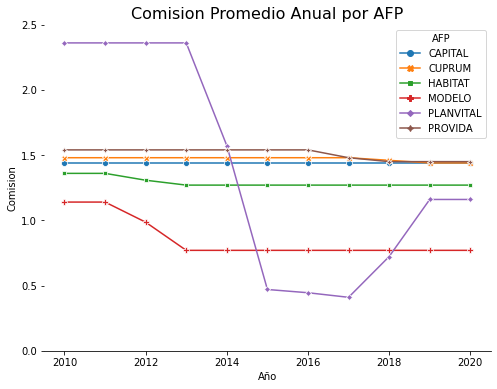

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))

df_promedio_comision = df_comision.groupby(['Año','AFP']).mean()['Comision'].reset_index()
sns.lineplot(y ='Comision', x ='Año', data = df_promedio_comision, hue = 'AFP', markers=True, dashes=False, style='AFP')
plt.ylim([0,2.5])
plt.title('Comision Promedio Anual por AFP',fontsize = 16)
sns.despine(left=True,top = True,bottom = False)

# **Metodologia 1: Rentabilidades Mensuales**


In [59]:
UF_2010_10_31 = 21339.28
Salario = 1000000
Salario_UF = Salario/UF_2010_10_31
#Salario_UF = 1000000
Monto_cotizar = Salario_UF*0.1

In [95]:
def afps(afp,Fondo):
    
    fondo = pd.DataFrame(columns = ['Año','Periodo', 'AFP','Fondo' , 'Cotizacion Acumuladas', 
                                      'Comision Mensual Acumuladas','Interes Ganados Acumulados', 'Saldo Acumulado final en UF'])
    fondo['Año'] = fechas_df['Año']
    fondo['Periodo'] = fechas_df['mes']
    fondo['AFP'] = afp
    fondo['Fondo'] = Fondo

    df = df_rentabilidad.loc[(df_rentabilidad['AFP'] == afp) & (df_rentabilidad['Fondo'] == Fondo)]    
    df = df.reset_index()
    df = pd.concat([df['Rentabilidad Mensual'], fondo], axis=1, sort=False)
    df_comision_f = df_comision.loc[df_comision['AFP'] == afp]
    
    df_comision_f = df_comision_f.reset_index()
    df_comision_f = df_comision_f.iloc[:-1,:]

    df= pd.concat([df_comision_f['Comision'], df], axis=1, sort=False)
    #return df_provida
    df = df[['Año','Periodo','AFP','Fondo','Rentabilidad Mensual','Comision', 'Cotizacion Acumuladas', 
                             'Comision Mensual Acumuladas','Interes Ganados Acumulados', 'Saldo Acumulado final en UF']]
    
    df['Rentabilidad Mensual'] = df['Rentabilidad Mensual']/100
    df['Comision'] = df['Comision']/100
    
    for i in range(120):
        if i ==0:
            df.iloc[i,6] = round(Salario_UF * (0.1 + df.iloc[i,5]),3)
            df.iloc[i,7] = round(Salario_UF *  df.iloc[i,5],3)
            df.iloc[i,8] = round((df.iloc[i,6] - df.iloc[i,7]) * df.iloc[i,4],3)
            df.iloc[i,9] = round(df.iloc[i,6] + df.iloc[i,8]  - df.iloc[i,7],3)
        else:
            df.iloc[i,6] = round(df.iloc[i-1,6] + Salario_UF * (0.1 + df.iloc[i-1,5]),3)
            df.iloc[i,7] = round(df.iloc[i-1,7] + Salario_UF *  df.iloc[i-1,5],3)
            df.iloc[i,8] =  round(df.iloc[i-1,8] + (df.iloc[i-1,9] + Salario_UF*0.1) * 
                                          df.iloc[i,4],3)
            df.iloc[i,9] = round(df.iloc[i,6] + df.iloc[i,8]  - df.iloc[i,7],3)
            
            
    return df.iloc[:-1,:]

In [96]:
afps('CAPITAL','FONDO A').tail()

,Año,Periodo,AFP,Fondo,Rentabilidad Mensual,Comision,Cotizacion Acumuladas,Comision Mensual Acumuladas,Interes Ganados Acumulados,Saldo Acumulado final en UF
114,2020,04,CAPITAL,FONDO A,0.0855,0.0144,616.515,77.625,97.113,636.003
115,2020,05,CAPITAL,FONDO A,-0.0066,0.0144,621.876,78.3,92.884,636.46
116,2020,06,CAPITAL,FONDO A,0.0534,0.0144,627.237,78.975,127.121,675.383
117,2020,07,CAPITAL,FONDO A,-0.0015,0.0144,632.598,79.65,126.101,679.049
118,2020,08,CAPITAL,FONDO A,0.0547,0.0144,637.959,80.325,163.501,721.135


In [97]:
FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']
AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA']

result = pd.DataFrame()

for i in FONDOS:
    for x in AFPS:
        resultados = afps(x,i)
        resultados['Fecha'] = fechas_df['Fecha']
        result = result.append(resultados, ignore_index=True)
result

,Año,Periodo,AFP,Fondo,Rentabilidad Mensual,Comision,Cotizacion Acumuladas,Comision Mensual Acumuladas,Interes Ganados Acumulados,Saldo Acumulado final en UF,Fecha
0,2010,10,CAPITAL,FONDO A,0.0576,0.0144,5.361,0.675,0.27,4.956,2010-10-01
1,2010,11,CAPITAL,FONDO A,0.0322,0.0144,10.722,1.35,0.58,9.952,2010-11-01
2,2010,12,CAPITAL,FONDO A,-0.0138,0.0144,16.083,2.025,0.378,14.436,2010-12-01
3,2011,01,CAPITAL,FONDO A,0.0129,0.0144,21.444,2.7,0.625,19.369,2011-01-01
4,2011,02,CAPITAL,FONDO A,0.0007,0.0144,26.805,3.375,0.642,24.072,2011-02-01
...,...,...,...,...,...,...,...,...,...,...,...
3565,2020,04,PROVIDA,FONDO E,0.0576,0.0145,620.45,81.525,104.025,642.95,2020-04-01
3566,2020,05,PROVIDA,FONDO E,0.0438,0.0145,625.816,82.204,132.391,676.003,2020-05-01
3567,2020,06,PROVIDA,FONDO E,0.0056,0.0145,631.182,82.883,136.203,684.502,2020-06-01
3568,2020,07,PROVIDA,FONDO E,-0.0045,0.0145,636.548,83.562,133.102,686.088,2020-07-01


**RESULTADOS FONDO A**



Monto Final ahorrado por cada AFP en el Fondo A


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


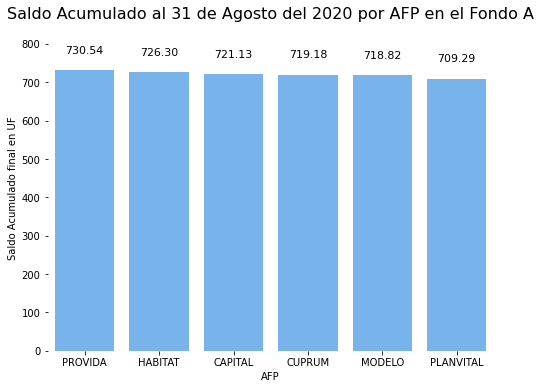

In [98]:
#FONDO A
print('Monto Final ahorrado por cada AFP en el Fondo A')
result_a = result.loc[(result['Fondo'] == 'FONDO A') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

#plt.figure(figsize = (6,6))
#sns.barplot(y = 'AFP', x = 'Saldo Acumulado final en UF', data = result_a, color="b")

#sns.despine(left=True, bottom=True)

x_axis = result_a['AFP']
y_axis = result_a['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo A', fontsize = 16)
sns.despine(left=True, bottom=True)

**RESULTADOS FONDO B**


Monto Final ahorrado por cada AFP en el Fondo B


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


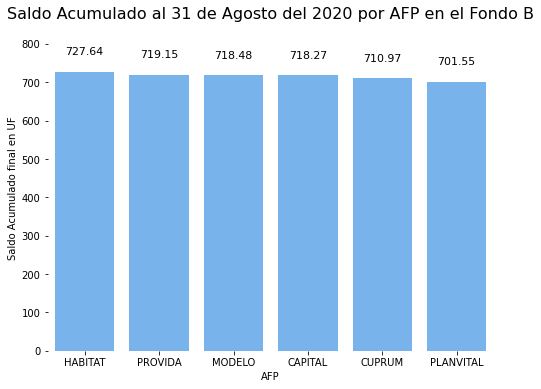

In [99]:
#FONDO B
print('Monto Final ahorrado por cada AFP en el Fondo B')
result_b = result.loc[(result['Fondo'] == 'FONDO B') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

x_axis = result_b['AFP']
y_axis = result_b['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo B', fontsize = 16)
sns.despine(left=True, bottom=True)


**RESULTADOS FONDO C**


Monto Final ahorrado por cada AFP en el Fondo C


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


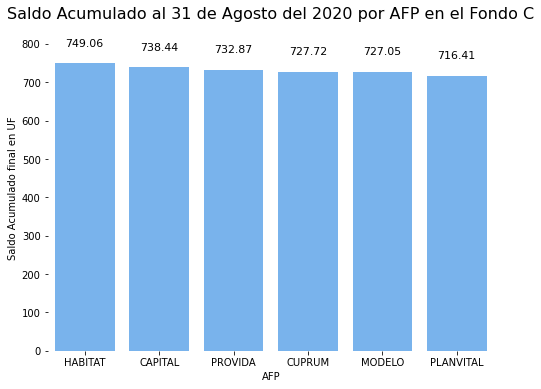

In [100]:
#fondo C
print('Monto Final ahorrado por cada AFP en el Fondo C')
result_c = result.loc[(result['Fondo'] == 'FONDO C') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

x_axis = result_c['AFP']
y_axis = result_c['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo C', fontsize = 16)
sns.despine(left=True, bottom=True)

**RESULTADOS FONDO D**

Monto Final ahorrado por cada AFP en el Fondo D


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


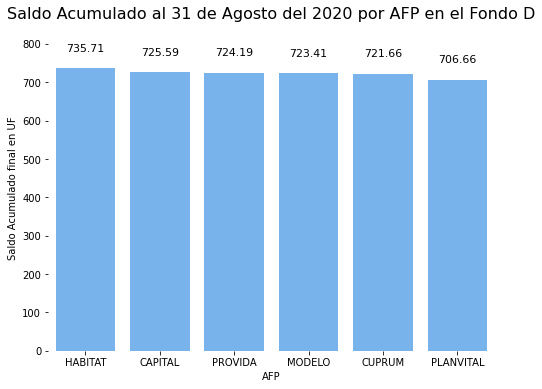

In [101]:
#fondo D
print('Monto Final ahorrado por cada AFP en el Fondo D')
result_d = result.loc[(result['Fondo'] == 'FONDO D') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

x_axis = result_d['AFP']
y_axis = result_d['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo D', fontsize = 16)
sns.despine(left=True, bottom=True)

**RESULTADOS FONDO E**


Monto Final ahorrado por cada AFP en el Fondo E


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


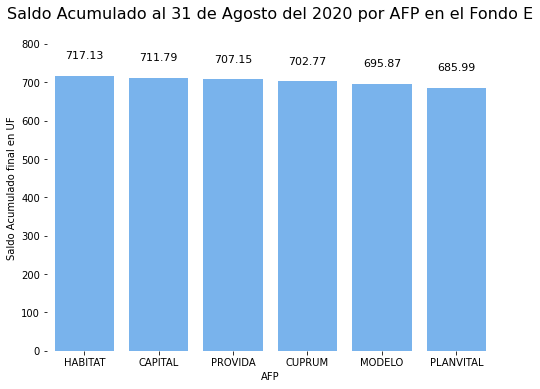

In [102]:
#fondo E
print('Monto Final ahorrado por cada AFP en el Fondo E')
result_e = result.loc[(result['Fondo'] == 'FONDO E') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

x_axis = result_e['AFP']
y_axis = result_e['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo E', fontsize = 16)
sns.despine(left=True, bottom=True)

# **Metodologia 2: Rentabilidad Anuales**


In [103]:
UF_2010_10_01 = 21339.28
Salario = 1000000
Salario_UF = Salario/UF_2010_10_01
#Salario_UF = 1000000
Monto_cotizar = Salario_UF*0.1

Salario_UF

46.86193723499575

In [83]:
from google.colab import files
uploaded = files.upload()

Saving RENTABILIDAD_ANUAL.csv to RENTABILIDAD_ANUAL.csv


In [104]:
df_renta_anual = pd.read_csv('RENTABILIDAD_ANUAL.csv', encoding='ISO-8859-1', sep = ';')

def mes():
    conteo = 0
    for i in df_renta_anual['Periodo']:
        if   i < 10 :
            df_renta_anual.iloc[conteo,1]= "0" + str(i)
        else:
            df_renta_anual.iloc[conteo,1]= str(i)
        conteo = conteo +1
mes()

df_renta_anual

,Año,Periodo,AFP,FONDO,RENTABILIDAD
0,2011,09,CAPITAL,FONDO A,-10.92
1,2011,09,CUPRUM,FONDO A,-10.16
2,2011,09,HABITAT,FONDO A,-10.19
3,2011,09,MODELO,FONDO A,-10.00
4,2011,09,PLANVITAL,FONDO A,-10.25
...,...,...,...,...,...
295,2020,08,CUPRUM,FONDO E,2.23
296,2020,08,HABITAT,FONDO E,2.62
297,2020,08,MODELO,FONDO E,4.00
298,2020,08,PLANVITAL,FONDO E,-0.14


In [109]:
def rentabilidad_anual(afp, fondo):

    df_anual = df_renta_anual.loc[(df_renta_anual['AFP'] == afp) &  (df_renta_anual['FONDO'] == fondo)]    
    df_anual = df_anual.reset_index()
    
    
    df_comision_f = df_comision.loc[df_comision['AFP'] == afp]
    
    df_comision_f = df_comision_f.reset_index()
    df_comision_f = df_comision_f.iloc[:-1,:]
    
    df_comision_f1 = df_comision_f.loc[df_comision_f['Periodo'] == '09']
    df_comision_f2 = df_comision_f.loc[(df_comision_f['Periodo'] =='08') & (df_comision_f['Año'] ==2020)]
    df_comision_f1_f2 = [df_comision_f1, df_comision_f2]
    df_comision_anual = pd.concat(df_comision_f1_f2)
    
    df_comision_anual.drop(['index'], axis=1, inplace = True)
    df_anual.drop(['index'], axis=1, inplace = True)
    
    df_anual = df_anual.reset_index()
    df_comision_anual = df_comision_anual.reset_index()

    df_result = df_anual.merge(df_comision_anual, on=['Periodo', 'Año'])
    
    df_result = df_result[['Año','Periodo','AFP_x','RENTABILIDAD','Comision']]
    df_result.rename(columns={"AFP_x": "AFP",'RENTABILIDAD':'Rentabilidad'}, inplace = True)
  
    df_result['Cotizacion Anuales Acumuladas'] = 0
    df_result['Comision Anuales Acumuladas'] = 0
    df_result['Interes Ganados Acumulados'] = 0
    df_result['Saldo Acumulado final en UF'] = 0
    
    df_result['Rentabilidad'] =  df_result['Rentabilidad'].apply(lambda x: x/100)
    df_result['Comision'] =  df_result['Comision'].apply(lambda x: x/100)
  
    for i in range(10):
        if i ==0:
            df_result.iloc[i,5] = round(12*Salario_UF * (0.1 + df_result.iloc[i,4]),3)
            df_result.iloc[i,6] = round(12*Salario_UF *  df_result.iloc[i,4],3)
            df_result.iloc[i,7] = round((df_result.iloc[i,5] - df_result.iloc[i,6]) * df_result.iloc[i,3],3)
            df_result.iloc[i,8] = round(df_result.iloc[i,5] + df_result.iloc[i,7]  - df_result.iloc[i,6],3)
        elif i ==9:
            df_result.iloc[i,5] = round(df_result.iloc[i-1,5] + 11* Salario_UF * (0.1 + df_result.iloc[i-1,4]),3)
            df_result.iloc[i,6] = round(df_result.iloc[i-1,6] + 11*Salario_UF *  df_result.iloc[i-1,4],3)
            df_result.iloc[i,7] =  round(df_result.iloc[i-1,7] + (df_result.iloc[i-1,8] + 11*Salario_UF*0.1) * 
                                          df_result.iloc[i,3],3)
            df_result.iloc[i,8] = round(df_result.iloc[i,5] + df_result.iloc[i,7]  - df_result.iloc[i,6],3)
        else:
            df_result.iloc[i,5] = round(df_result.iloc[i-1,5] + 12* Salario_UF * (0.1 + df_result.iloc[i-1,4]),3)
            df_result.iloc[i,6] = round(df_result.iloc[i-1,6] + 12*Salario_UF *  df_result.iloc[i-1,4],3)
            df_result.iloc[i,7] =  round(df_result.iloc[i-1,7] + (df_result.iloc[i-1,8] + 12*Salario_UF*0.1) * 
                                          df_result.iloc[i,3],3)
            df_result.iloc[i,8] = round(df_result.iloc[i,5] + df_result.iloc[i,7]  - df_result.iloc[i,6],3)
    
    df_result['Fondo'] = fondo
    return df_result

rentabilidad_anual('CAPITAL', 'FONDO A')

,Año,Periodo,AFP,Rentabilidad,Comision,Cotizacion Anuales Acumuladas,Comision Anuales Acumuladas,Interes Ganados Acumulados,Saldo Acumulado final en UF,Fondo
0,2011,09,CAPITAL,-0.1092,0.0144,64.332,8.098,-6.141,50.093,FONDO A
1,2012,09,CAPITAL,0.0547,0.0144,128.664,16.196,-0.325,112.143,FONDO A
2,2013,09,CAPITAL,0.0607,0.0144,192.996,24.294,9.896,178.598,FONDO A
3,2014,09,CAPITAL,0.1386,0.0144,257.328,32.392,42.444,267.380,FONDO A
4,2015,09,CAPITAL,-0.0187,0.0144,321.660,40.490,36.392,317.562,FONDO A
5,2016,09,CAPITAL,0.0328,0.0144,385.992,48.588,48.653,386.057,FONDO A
6,2017,09,CAPITAL,0.1300,0.0144,450.324,56.686,106.151,499.789,FONDO A
7,2018,09,CAPITAL,0.0116,0.0144,514.656,64.784,112.601,562.473,FONDO A
8,2019,09,CAPITAL,0.0610,0.0144,578.988,72.882,150.342,656.448,FONDO A
9,2020,08,CAPITAL,0.0854,0.0144,637.959,80.305,210.805,768.459,FONDO A


In [111]:
FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']
AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA']

result = pd.DataFrame()

for x in FONDOS:
    for i in AFPS:
        resultados = rentabilidad_anual(i,x)
        result = result.append(resultados, ignore_index=True)

**RESULTADOS FONDO A**

Monto Final ahorrado por cada AFP en el Fondo A


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


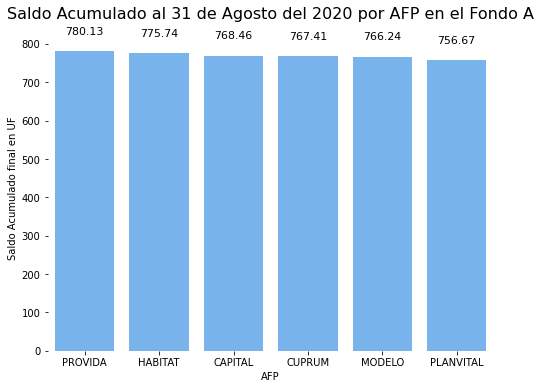

In [112]:
print('Monto Final ahorrado por cada AFP en el Fondo A')
result_a = result.loc[(result['Fondo'] == 'FONDO A') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

#plt.figure(figsize = (6,6))
#sns.barplot(y = 'AFP', x = 'Saldo Acumulado final en UF', data = result_a, color="b")

#sns.despine(left=True, bottom=True)

x_axis = result_a['AFP']
y_axis = result_a['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo A', fontsize = 16)
sns.despine(left=True, bottom=True)

**RESULTADOS FONDO B**

Monto Final ahorrado por cada AFP en el Fondo B


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


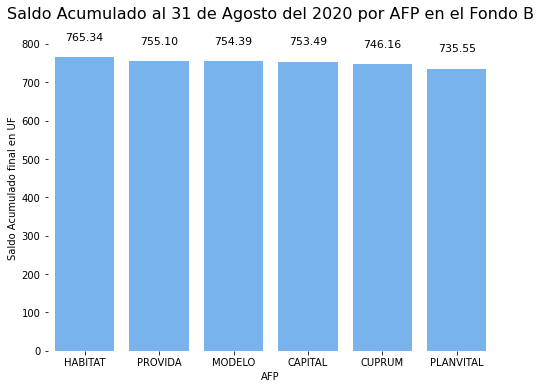

In [113]:
#FONDO B
print('Monto Final ahorrado por cada AFP en el Fondo B')
result_b = result.loc[(result['Fondo'] == 'FONDO B') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

x_axis = result_b['AFP']
y_axis = result_b['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo B', fontsize = 16)
sns.despine(left=True, bottom=True)

**RESULTADOS FONDO C**

Monto Final ahorrado por cada AFP en el Fondo C


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


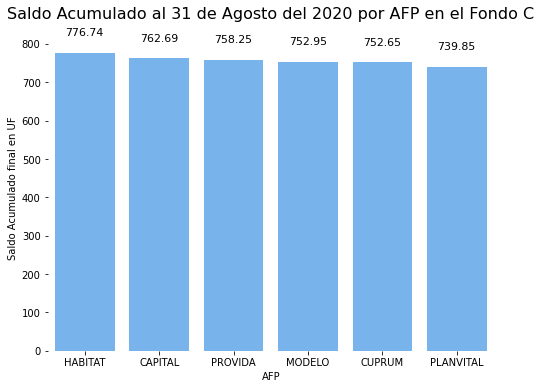

In [114]:
#fondo C
print('Monto Final ahorrado por cada AFP en el Fondo C')
result_c = result.loc[(result['Fondo'] == 'FONDO C') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

x_axis = result_c['AFP']
y_axis = result_c['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo C', fontsize = 16)
sns.despine(left=True, bottom=True)

**RESULTADOS FONDO D**

Monto Final ahorrado por cada AFP en el Fondo D


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


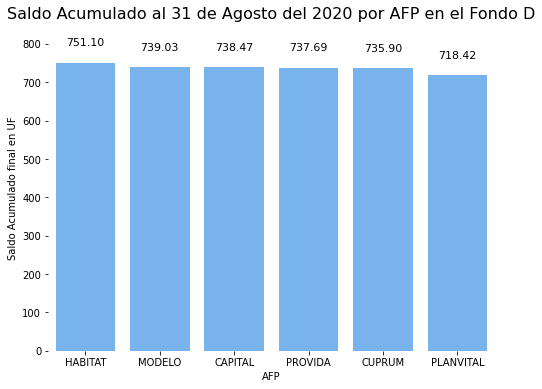

In [115]:
#fondo D
print('Monto Final ahorrado por cada AFP en el Fondo D')
result_d = result.loc[(result['Fondo'] == 'FONDO D') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

x_axis = result_d['AFP']
y_axis = result_d['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo D', fontsize = 16)
sns.despine(left=True, bottom=True)

**RESULTADOS FONDO E**

Monto Final ahorrado por cada AFP en el Fondo E


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


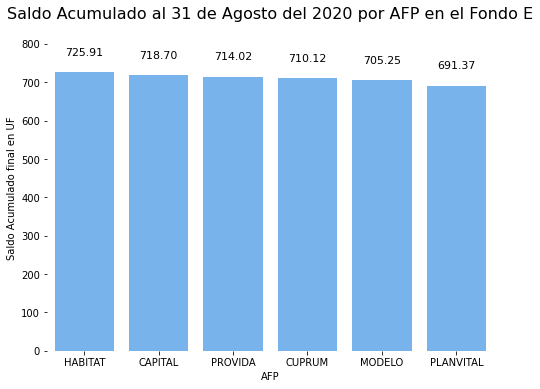

In [116]:
#fondo E
print('Monto Final ahorrado por cada AFP en el Fondo E')
result_e = result.loc[(result['Fondo'] == 'FONDO E') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Saldo Acumulado final en UF']].sort_values('Saldo Acumulado final en UF', ascending = False)

x_axis = result_e['AFP']
y_axis = result_e['Saldo Acumulado final en UF']

plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,850)

plt.title('Saldo Acumulado al 31 de Agosto del 2020 por AFP en el Fondo E', fontsize = 16)
sns.despine(left=True, bottom=True)